<a href="https://colab.research.google.com/github/vinayprabhu/Colabarama/blob/master/ssim_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook showcases:
-  How to use SSIM in TF
(https://www.tensorflow.org/api_docs/python/tf/image/ssim) + Eager mode
-  The delta between the Skimage and TF implementations:

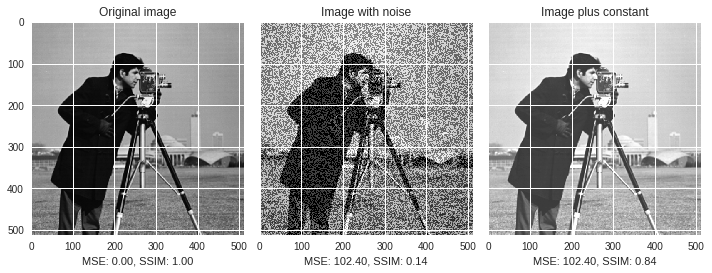

The skimage computed values are:
0.1400855723056987 0.841719943377482
The TF computed values are:


(0.12249652, 0.8365968)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim


img = img_as_float(data.camera())
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
noise[np.random.random(size=noise.shape) > 0.5] *= -1
def mse(x, y):
    return np.linalg.norm(x - y)


img_noise = img + noise
img_const = img + abs(noise)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mse(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_noise = mse(img, img_noise)
ssim_noise = ssim(img, img_noise,
                  data_range=img_noise.max() - img_noise.min())

mse_const = mse(img, img_const)
ssim_const = ssim(img, img_const,
                  data_range=img_const.max() - img_const.min())

label = 'MSE: {:.2f}, SSIM: {:.2f}'

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(label.format(mse_none, ssim_none))
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(label.format(mse_noise, ssim_noise))
ax[1].set_title('Image with noise')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(label.format(mse_const, ssim_const))
ax[2].set_title('Image plus constant')

plt.tight_layout()
plt.show()
print('The skimage computed values are:')
print(ssim_noise,ssim_const)
#####################################
import tensorflow as tf
# Read images from file.
tf.enable_eager_execution()
im1 = tf.image.convert_image_dtype(tf.image.grayscale_to_rgb(img.reshape(512,512,1)), tf.float32)
im2 = tf.image.convert_image_dtype(tf.image.grayscale_to_rgb(img_noise.reshape(512,512,1)), tf.float32)
im3 = tf.image.convert_image_dtype(tf.image.grayscale_to_rgb(img_const.reshape(512,512,1)), tf.float32)
ssim_noise_tf = tf.image.ssim(im1, im2, max_val=img_noise.max() - img_noise.min())
ssim_const_tf = tf.image.ssim(im1, im3, max_val=img_const.max() - img_const.min())
print('The TF computed values are:')
ssim_noise_tf.numpy(),ssim_const_tf.numpy()